In [23]:
library("ggplot2")
library("tidyverse")

# Ivanov et al: 28 unnannoteted in gencode35 genes vs PhyloSET, RiboSET

In [3]:
q = 4  # 4 out of 60 genes are red (in study)
m = 28 # those are red balls or genes in study 
n = 20000-28 # urn has 20000 in total = genes 
k = 60 # we draw 60 genes from urn

In [7]:
#1-phyper(q, m, n, k, lower.tail = TRUE, log.p = FALSE)

In [8]:
n_A = 28;n_B = 60; n_C = 20000; n_A_B = 4

phyper(n_A_B - 1, n_A, n_C-n_A, n_B, lower.tail = FALSE) 

[1] 1.419632e-06

In [42]:
n_A = 28;n_B = 390; n_C = 20000; n_A_B = 2

phyper(n_A_B - 1, n_A, n_C-n_A, n_B, lower.tail = FALSE) 

[1] 0.1029169

# Van Damme et al study

In [43]:
# PhyloSET

n_A = 17; n_B = 60; n_C = 20000; n_A_B = 2

phyper(n_A_B - 1, n_A, n_C-n_A, n_B, lower.tail = FALSE) 

[1] 0.001169268

In [44]:
# RiboSET

n_A = 17; n_B = 390; n_C = 20000; n_A_B = 7

phyper(n_A_B - 1, n_A, n_C-n_A, n_B, lower.tail = FALSE) 

[1] 1.670011e-08

# Yeom L 

In [45]:
# PhyloSET

n_A = 171; n_B = 60; n_C = 20000; n_A_B = 1

phyper(n_A_B - 1, n_A, n_C-n_A, n_B, lower.tail = FALSE) 

[1] 0.4030789

In [46]:
# RiboSET

n_A = 171; n_B = 390; n_C = 20000; n_A_B = 17

phyper(n_A_B - 1, n_A, n_C-n_A, n_B, lower.tail = FALSE) 

[1] 4.40988e-08

In [ ]:
4.409e-08

# RiboSET/PhyloSET 

In [49]:
n_A = 60; n_B = 390; n_C = 20000; n_A_B = 8

phyper(n_A_B - 1, n_A, n_C-n_A, n_B, lower.tail = FALSE) 

[1] 2.053331e-05

In [ ]:
RiboSET and PhyloSET overlap is also significant (hypergeometric, pv-adj=)

# Multiple testing correction 

In [50]:
p.adjust(c(1.419e-06, 0.102, 0.0011, 1.67e-08, 4.409e-08, 0.4030, 2.05333115431375e-05), method = 'BH')

[1] 3.31100e-06 1.19000e-01 1.54000e-03 1.16900e-07 1.54315e-07 4.03000e-01
[7] 3.59333e-05

In [ ]:
3.59e-05

# If we simulate sets of size 28 and 60 from 20k sets, do we get similar p-value? 

In [10]:
f <- read.csv('../../tmp_res/metadata_pc_g25.txt', sep='\t')

In [13]:
all_genes <- unique(f$gene)

In [14]:
phyloset <- c('HES3',
 'RERE',
 'IFFO2',
 'TAF12',
 'SFPQ',
 'OAZ3',
 'VANGL2',
 'NRXN1',
 'C1QL2',
 'MAP3K19',
 'SLC6A1',
 'ZBTB47',
 'ADCY5',
 'H1FX',
 'TRPC1',
 'SLC4A4',
 'MAB21L2',
 'FBXW7',
 'HNRNPA0',
 'MARCKS',
 'MAP3K5',
 'POMZP3',
 'SLC35G5',
 'ENY2',
 'C1QL3',
 'NAV2',
 'ALDH3B2',
 'GLTP',
 'MAB21L1',
 'PELI2',
 'PLEKHG3',
 'FEM1B',
 'SULT1A1',
 'AC007906.1',
 'MAF',
 'GLOD4',
 'FXR2',
 'TNFAIP1',
 'TBC1D29',
 'HOXB5',
 'RPTOR',
 'MIB1',
 'SMAD7',
 'CCDC8',
 'CYTH2',
 'CACNG8',
 'ACTL10',
 'GDF5OS',
 'RIMS4',
 'HELZ2',
 'RANBP1',
 'LRP5L',
 'SOX10',
 'KIAA0930',
 'WWC3',
 'USP27X',
 'DLG3',
 'PABPC1L2B',
 'PABPC1L2A',
 'UBE2A')

In [15]:
un28 <- c('HDGF',
 'NTF3',
 'IFT46',
 'ENOX2',
 'RASL10B',
 'NGF',
 'KCNN4',
 'C1QL2',
 'FGFR1',
 'MFSD4B',
 'TMEM8B',
 'C1QL4',
 'EPHX3',
 'STARD10',
 'CITED1',
 'CITED2',
 'C1QL3',
 'EIF4G3',
 'CYTH2',
 'RASD2',
 'NHLRC4',
 'VANGL2',
 'YPEL4',
 'TEAD1',
 'FAM217B',
 'METTL23',
 'UFSP1',
 'TLE3')

In [16]:
sets <- list(phyloset, un28)

In [31]:
# Hypergeometric null distribution.
hyper <- rhyper(
  nn=length(all_genes), m=length(sets[[1]]),
  n=length(all_genes) - length(sets[[1]]),
  k=length(sets[[2]])
)

# Simulated null distribution.
simulated <- map_dbl(seq_len(20330), function(x) {
   sim <- map(lengths(sets), ~sample(all_genes, .x))
   sim <- length(reduce(sim, intersect))
   return(sim)
})

In [32]:
length(simulated)

[1] 20330

In [33]:
length(hyper)

[1] 20330

In [36]:
observed <- 4

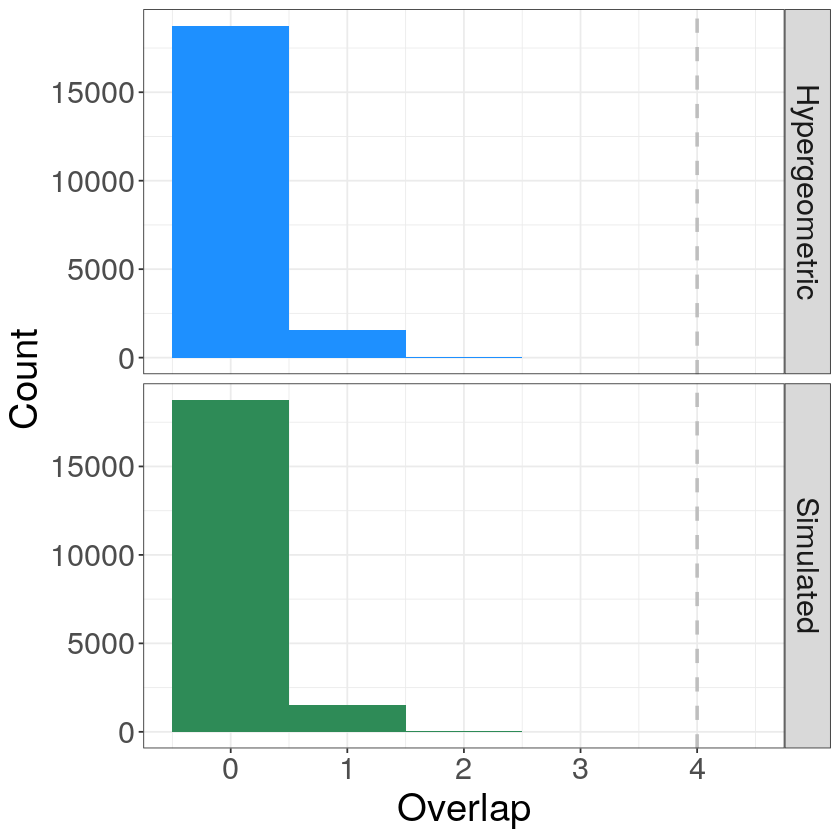

In [41]:
data.frame(Simulated=simulated, Hypergeometric=hyper) %>%
  pivot_longer(everything(), names_to="Method", values_to="Overlap") %>%
  ggplot(aes(x=Overlap, fill=Method)) +
    geom_histogram(binwidth=1) +
    geom_vline(xintercept=observed, lty=2, color="grey", size=1) +
    theme_bw() +
    theme(text=element_text(size=23), legend.position="none") +
    facet_grid(Method~.) +
    scale_fill_manual(values=c("dodgerblue", "seagreen")) +
    ylab("Count")

In [ ]:
Ivanov et al 